<a href="https://colab.research.google.com/github/Gogulaanand/Fault-Diagnosis/blob/master/Fault_Diagnosis(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import io
import keras
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded=files.upload()

Saving projdata1.csv to projdata1.csv


In [0]:
df=pd.read_csv(io.StringIO(uploaded['projdata1.csv'].decode("utf-8")),engine='python',sep=",")
# df1=pd.read_csv(io.StringIO(uploaded['projdata_test_set.csv'].decode("utf-8")),engine='python',sep=",")

ds=df.sample(frac=1)
# ds1=df1.sample(frac=1)

In [0]:
y=ds.as_matrix(columns=ds.columns[4:])
X=ds.as_matrix(columns=ds.columns[1:4])
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
Y_train=to_categorical(Y_train,num_classes=4,dtype='int32')
Y_test=to_categorical(Y_test,num_classes=4,dtype='int32')

In [0]:
model=tf.keras.Sequential()

In [0]:
model.add(layers.Dense(10,input_shape=(3,),activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# bias_regularizer=tf.keras.regularizers.l2(0.01),
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=tf.train.AdamOptimizer(0.0005),metrics=['accuracy'])

In [14]:
history=model.fit(X_train,Y_train,validation_split=0.25,epochs=550,batch_size=128)

Train on 59999 samples, validate on 20000 samples
Epoch 1/550
59999/59999 [==============================] - 2s 41us/sample - loss: 1.7207 - acc: 0.2916 - val_loss: 1.3709 - val_acc: 0.2887
Epoch 2/550
59999/59999 [==============================] - 2s 40us/sample - loss: 1.3621 - acc: 0.3089 - val_loss: 1.3523 - val_acc: 0.3144
Epoch 3/550
59999/59999 [==============================] - 2s 41us/sample - loss: 1.3218 - acc: 0.3536 - val_loss: 1.2470 - val_acc: 0.4327
Epoch 4/550
59999/59999 [==============================] - 2s 40us/sample - loss: 1.0957 - acc: 0.4931 - val_loss: 0.8368 - val_acc: 0.6840
Epoch 5/550
59999/59999 [==============================] - 2s 41us/sample - loss: 0.7307 - acc: 0.7320 - val_loss: 0.6328 - val_acc: 0.8130
Epoch 6/550
59999/59999 [==============================] - 2s 41us/sample - loss: 0.6245 - acc: 0.7822 - val_loss: 0.5666 - val_acc: 0.8318
Epoch 7/550
59999/59999 [==============================] - 2s 41us/sample - loss: 0.5518 - acc: 0.8110 - val_l

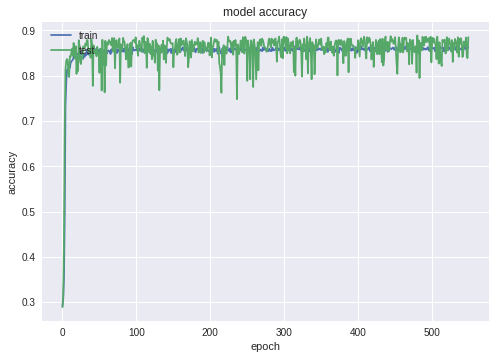

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

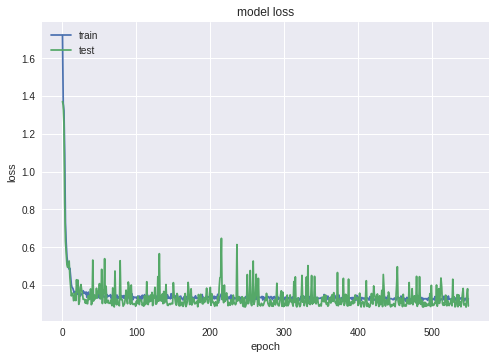

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
test_loss,test_acc=model.evaluate(X_test,Y_test,batch_size=64)
print(test_acc)

20000/20000 [==============================] - 1s 34us/sample - loss: 0.2932 - acc: 0.8813
0.88125


In [0]:
url='https://github.com/Gogulaanand/Fault-Diagnosis/blob/master/projdata1.csv'
df1=pd.read_csv(url)
df1.head()